# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [2]:
# Loading all the libraries
import pandas as pd
import numpy as np
import math
from functools import reduce
import seaborn as sns
from matplotlib import pyplot as plt
import random
from scipy import stats as st

## Load data

In [3]:
# Load the data files into different DataFrames
# Let's use parse argument to transform date columns into datetime format
calls = pd.read_csv('/datasets/megaline_calls.csv', parse_dates=['call_date'])
calls.name = 'calls'
internet = pd.read_csv('/datasets/megaline_internet.csv', parse_dates=['session_date'])
internet.name = 'internet'
messages = pd.read_csv('/datasets/megaline_messages.csv', parse_dates=['message_date'])
messages.name = 'messages'
plans = pd.read_csv('/datasets/megaline_plans.csv')
plans.name = 'plans'
users = pd.read_csv('/datasets/megaline_users.csv', parse_dates=['reg_date', 'churn_date'])
users.name = 'users'



## Prepare the data

The data for this project is split into several tables. 

Let's explore each to get an initial understanding of the data.

In [4]:
#The function below will automatically print all the essential data on every table.
def all_data (data):
        display(data.name)
        display('HEAD')
        display(data.head())
        display('INFO')
        display(data.info())
        display('DESCRIBE')
        display(data.describe())
        
for data in [calls, internet, messages, plans, users]:
    display(all_data(data))


'calls'

'HEAD'

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


'INFO'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


None

'DESCRIBE'

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


None

'internet'

'HEAD'

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


'INFO'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

'DESCRIBE'

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


None

'messages'

'HEAD'

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


'INFO'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


None

'DESCRIBE'

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


None

'plans'

'HEAD'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


'INFO'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

'DESCRIBE'

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


None

'users'

'HEAD'

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


'INFO'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

'DESCRIBE'

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


None

## Plans

In [5]:
# Print the general/summary information about the plans' DataFrame
display(plans.describe())
display(plans.info())


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

In [6]:
# Print a sample of data for plans
display(plans.head())


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Users

In [8]:
# Print the general/summary information about the users' DataFrame
users.describe()



,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [10]:
# Print a sample of data for users
users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


### Fix Data

**The missing values in the Churn rate column are to be filled in with None values**

In [11]:
users.churn_date=users.churn_date.fillna('None')

In [12]:
print(users.churn_date.isna().sum())

0


### Enrich Data

**Reg_date column should be broken down into months, years, days columns to ease further calculations**

In [13]:
users['year']= users.reg_date.dt.year
users['month']= users.reg_date.dt.month
users['day']= users.reg_date.dt.day

In [14]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year,month,day
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,None,2018,12,24
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,2018,8,13
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,None,2018,10,21
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,None,2018,1,28
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,None,2018,5,23


## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [16]:
# Print a sample of data for calls
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Fix data

Fixing obvious issues with the data given the initial observations.

In [17]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [18]:
#Since megaline rounds seconds up to minutes, let's round each individual call up
calls['duration'] = np.ceil(calls['duration'])
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


In [19]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,7.146673
std,139.416268,5.953919
min,1000.000000,0.000000
25%,1128.000000,2.000000
50%,1247.000000,6.000000
75%,1365.000000,11.000000
max,1499.000000,38.000000


In [20]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

**To ease calculations later in the project it is suggested to break date into years, months and days** 

In [21]:
calls['year']= calls.call_date.dt.year
calls['month']= calls.call_date.dt.month
calls['day']= calls.call_date.dt.day

In [22]:
calls.head()

,id,user_id,call_date,duration,year,month,day
0,1000_93,1000,2018-12-27,9.0,2018,12,27
1,1000_145,1000,2018-12-27,14.0,2018,12,27
2,1000_247,1000,2018-12-27,15.0,2018,12,27
3,1000_309,1000,2018-12-28,6.0,2018,12,28
4,1000_380,1000,2018-12-30,5.0,2018,12,30


## Messages

In [23]:
# Print the general/summary information about the messages' DataFrame
messages.describe()


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [24]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [25]:
# Print a sample of data for messages
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Enrich data

**To ease calculations later in the project it is suggested to break date into years, months and days** 

In [26]:
messages['year']= messages.message_date.dt.year
messages['month']= messages.message_date.dt.month
messages['day']= messages.message_date.dt.day

In [27]:
messages.head()

,id,user_id,message_date,year,month,day
0,1000_125,1000,2018-12-27,2018,12,27
1,1000_160,1000,2018-12-31,2018,12,31
2,1000_223,1000,2018-12-31,2018,12,31
3,1000_251,1000,2018-12-27,2018,12,27
4,1000_255,1000,2018-12-26,2018,12,26


## Internet

In [28]:
# Print the general/summary information about the internet DataFrame
display(internet.describe())
display(internet.info())

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


None

In [29]:
# Print a sample of data for the internet traffic
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Fix data

**Let's create a new column 'gb_used' and use that in total revenue per user calculations**

In [30]:
internet['gb_used'] = internet['mb_used']/1025
internet

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,0.087668
1,1000_204,1000,2018-12-31,0.00,0.000000
2,1000_379,1000,2018-12-28,660.40,0.644293
3,1000_413,1000,2018-12-26,270.99,0.264380
4,1000_442,1000,2018-12-27,880.22,0.858751
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.212741
104821,1499_216,1499,2018-12-30,304.72,0.297288
104822,1499_217,1499,2018-09-22,292.75,0.285610
104823,1499_218,1499,2018-12-07,0.00,0.000000


### Enrich data

**To ease calculations later in the project it is suggested to break date into years, months and days** 

In [31]:
internet['year']= internet.session_date.dt.year
internet['month']= internet.session_date.dt.month
internet['day']= internet.session_date.dt.day

In [32]:
internet.head()

,id,user_id,session_date,mb_used,gb_used,year,month,day
0,1000_13,1000,2018-12-29,89.86,0.087668,2018,12,29
1,1000_204,1000,2018-12-31,0.00,0.000000,2018,12,31
2,1000_379,1000,2018-12-28,660.40,0.644293,2018,12,28
3,1000_413,1000,2018-12-26,270.99,0.264380,2018,12,26
4,1000_442,1000,2018-12-27,880.22,0.858751,2018,12,27


## Study plan conditions

It is critical to understand how the plans work, how users are charged based on their plan subscription. 

Thus, printing out the plan information to view their conditions once again would be useful.

In [33]:
# Print out the plan conditions and make sure they are clear for you
display(plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Now, as the data is clean, let's aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.

In [34]:

display(users.tail())
display(calls.tail())
display(messages.tail())
display(internet.tail())



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year,month,day
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,None,2018,9,4
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,None,2018,2,20
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,None,2018,12,10
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,None,2018,2,4
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,None,2018,5,6


,id,user_id,call_date,duration,year,month,day
137730,1499_199,1499,2018-11-21,9.0,2018,11,21
137731,1499_200,1499,2018-10-20,11.0,2018,10,20
137732,1499_201,1499,2018-09-21,9.0,2018,9,21
137733,1499_202,1499,2018-10-10,1.0,2018,10,10
137734,1499_203,1499,2018-12-29,14.0,2018,12,29


,id,user_id,message_date,year,month,day
76046,1497_526,1497,2018-12-24,2018,12,24
76047,1497_536,1497,2018-12-24,2018,12,24
76048,1497_547,1497,2018-12-31,2018,12,31
76049,1497_558,1497,2018-12-24,2018,12,24
76050,1497_613,1497,2018-12-23,2018,12,23


,id,user_id,session_date,mb_used,gb_used,year,month,day
104820,1499_215,1499,2018-10-20,218.06,0.212741,2018,10,20
104821,1499_216,1499,2018-12-30,304.72,0.297288,2018,12,30
104822,1499_217,1499,2018-09-22,292.75,0.285610,2018,9,22
104823,1499_218,1499,2018-12-07,0.00,0.000000,2018,12,7
104824,1499_219,1499,2018-12-24,758.31,0.739815,2018,12,24


In [35]:
# Calculate the number of calls made by each user per month. Save the result.
calls_num = calls.groupby(['user_id','month'])['call_date'].count().reset_index()

calls_num


,user_id,month,call_date
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [36]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_mins = calls.groupby(['user_id','month'])['duration'].sum().reset_index()
display(calls_mins)

,user_id,month,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2253,1498,12,339.0
2254,1499,9,346.0
2255,1499,10,385.0
2256,1499,11,308.0


In [37]:
# Calculate the number of messages sent by each user per month. Save the result.

messages_num = messages.groupby(['user_id','month'])['message_date'].count().reset_index()
messages_num


,user_id,month,message_date
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [38]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet_volume = internet.groupby(['user_id','month'])['gb_used'].sum().reset_index()
internet_volume


,user_id,month,gb_used
0,1000,12,1.855093
1,1001,8,6.750390
2,1001,9,12.990068
3,1001,10,21.785844
4,1001,11,18.052976
...,...,...,...
2272,1498,12,22.573356
2273,1499,9,12.668059
2274,1499,10,19.017005
2275,1499,11,16.403737


Let's put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [39]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

data_frames = [calls_num,calls_mins,messages_num,internet_volume]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','month'], how='outer'), data_frames).fillna(0)
df_merged=df_merged.rename(columns={'call_date': 'call_num','duration':'call_duration', 'message_date':'message_num'})
df_merged

,user_id,month,call_num,call_duration,message_num,gb_used
0,1000,12,16.0,124.0,11.0,1.855093
1,1001,8,27.0,182.0,30.0,6.750390
2,1001,9,49.0,315.0,44.0,12.990068
3,1001,10,65.0,393.0,53.0,21.785844
4,1001,11,64.0,426.0,36.0,18.052976
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,12.721863
2289,1361,5,0.0,0.0,2.0,1.482624
2290,1482,10,0.0,0.0,2.0,0.000000
2291,1108,12,0.0,0.0,0.0,0.227483


In [40]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year,month,day
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,None,2018,12,24
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,2018,8,13
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,None,2018,10,21
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,None,2018,1,28
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,None,2018,5,23


In [41]:
# Add the plan information


df_merged_plans = df_merged.merge(users, on='user_id', how='outer').fillna(0)
display(df_merged_plans)
    


,user_id,month_x,call_num,call_duration,message_num,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,year,month_y,day
0,1000,12.0,16.0,124.0,11.0,1.855093,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,None,2018,12,24
1,1001,8.0,27.0,182.0,30.0,6.750390,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,2018,8,13
2,1001,9.0,49.0,315.0,44.0,12.990068,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,2018,8,13
3,1001,10.0,65.0,393.0,53.0,21.785844,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,2018,8,13
4,1001,11.0,64.0,426.0,36.0,18.052976,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,2018,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.0,0.000000,Kristopher,Lang,28,"Boston-Cambridge-Newton, MA-NH MSA",2018-12-31,surf,None,2018,12,31
2299,1319,0.0,0.0,0.0,0.0,0.000000,Eliseo,Carson,21,"Colorado Springs, CO MSA",2018-06-17,surf,None,2018,6,17
2300,1378,0.0,0.0,0.0,0.0,0.000000,Mckinley,Clayton,22,"Denver-Aurora-Lakewood, CO MSA",2018-12-17,surf,None,2018,12,17
2301,1463,0.0,0.0,0.0,0.0,0.000000,Dinorah,Simmons,30,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-11-27,ultimate,None,2018,11,27


In [42]:
df_merged_plans.groupby(['user_id','month_x','plan'])['gb_used'].sum()

user_id  month_x  plan    
1000     12.0     ultimate     1.855093
1001     8.0      surf         6.750390
         9.0      surf        12.990068
         10.0     surf        21.785844
         11.0     surf        18.052976
                                ...    
1498     12.0     surf        22.573356
1499     9.0      surf        12.668059
         10.0     surf        19.017005
         11.0     surf        16.403737
         12.0     surf        21.521180
Name: gb_used, Length: 2303, dtype: float64

In [43]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Calculating the monthly revenue from each user ( by subtracting the free package limit from the total number of calls, text messages, and data; multiplying the result by the calling plan value; add the monthly charge depending on the calling plan)

In [44]:
# Calculate the monthly revenue for each user

def revenue(row):
    plan = row['plan']
    duration = row['call_duration']
    messages = row['message_num']
    gb_used = row['gb_used']
    plan_cost = 0
    message_cost = 0
    duration_cost=0
    gb_used_cost = 0
    
    if plan == 'surf':
        plan_cost = 20
    else:
        plan_cost =70
    if (plan == 'surf') and (messages > 50):
        message_cost = (messages - 50) * 0.03
    if (plan == 'surf') and (duration > 500):
        duration_cost = (duration-500) * 0.03
    if (plan == 'surf') and (gb_used > 15):
        gb_used_cost = np.ceil(gb_used - 15) * 10
    
    if (plan == 'ultimate') and (messages > 1000):
        message_cost = (messages - 1000) * 0.01
    if (plan == 'ultimate') and (duration > 3000):
        duration_cost = (duration-3000) * 0.01
    if (plan == 'ultimate') and (gb_used > 30):
        gb_used_cost = np.ceil(gb_used - 30) * 7
        
    
    total_revenue=plan_cost+message_cost+duration_cost+gb_used_cost
    return total_revenue 

In [45]:
df_merged_plans['revenue'] = df_merged_plans.apply(revenue, axis=1)

In [46]:
#Checking that everything works
df = df_merged_plans.groupby(['user_id','month_x','plan'])['call_duration', 'message_num','gb_used', 'revenue'].sum()
df.query('plan == "surf" and revenue > 70')

/tmp/ipykernel_44/3678858259.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df_merged_plans.groupby(['user_id','month_x','plan'])['call_duration', 'message_num','gb_used', 'revenue'].sum()


call_duration  message_num    gb_used  revenue
user_id month_x plan                                                
1001    10.0    surf          393.0         53.0  21.785844    90.09
1003    12.0    surf         1104.0         50.0  26.384527   158.12
1004    6.0     surf          275.0         18.0  20.168605    80.00
        7.0     surf          381.0         26.0  23.918654   110.00
        8.0     surf          354.0         25.0  27.299259   150.00
...                             ...          ...        ...      ...
1498    7.0     surf          321.0          0.0  24.228654   120.00
        9.0     surf          363.0          0.0  22.270517   100.00
        10.0    surf          298.0          0.0  20.078790    80.00
        12.0    surf          339.0          0.0  22.573356   100.00
1499    12.0    surf          496.0          0.0  21.521180    90.00

[489 rows x 4 columns]

## Study user behaviour

1. Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. 
2. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.

### Calls

[Text(0.5, 1.0, 'Call duration per plan by month'),
 Text(0.5, 0, 'month'),
 Text(0, 0.5, 'duration')]

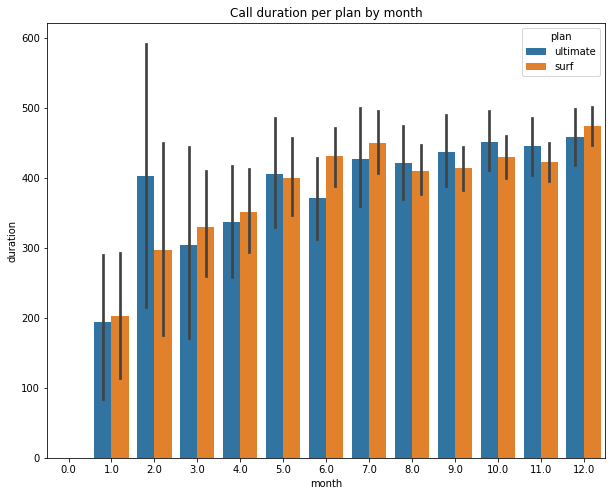

In [47]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.


plt.figure(figsize=(10,8))

sns.barplot(data=df_merged_plans, x='month_x', y='call_duration', hue='plan').set(
    title='Call duration per plan by month', xlabel = 'month', ylabel= 'duration')



**It can be derived from the bar chart, that call duration is about the same for both plans on average, with the exception of February, where ultimate plan users demonstrated a noticeable edge over the surf plan users.**

[Text(0.5, 1.0, 'Number of call minutes by plan')]

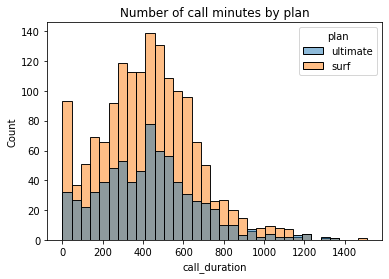

In [48]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
sns.histplot(data=df_merged_plans, x='call_duration', hue='plan').set(title='Number of call minutes by plan')


**It looks like surf plan users tend to enjoy considerably longer calls on average in comparison to the ultimate plan users.**

Calculating the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.

In [49]:
# Calculate the mean and the variance of the monthly call duration
surf_call_duration = df_merged_plans.query('plan== "surf"').groupby(['user_id', 'month_x'])['call_duration'].sum()
surf_plan = df_merged_plans.query('plan== "surf"')
ultimate_call_duration = df_merged_plans.query('plan== "ultimate"').groupby(['user_id', 'month_x'])['call_duration'].sum()
ultimate_plan= df_merged_plans.query('plan== "ultimate"')
print(f'The surf plan monthly call duration mean is: {surf_call_duration.mean()} ')

print(f'The surf plan monthly call duration variance is: {np.var(surf_call_duration)}')

print(f'The ultimate plan monthly call duration mean is: {ultimate_call_duration.mean()} ')
print(f'The ultimate plan monthly call duration variance is: {np.var(ultimate_call_duration)}')
df_merged_plans.pivot_table(index= 'plan', values = 'call_duration', aggfunc =['mean', 'var'])


The surf plan monthly call duration mean is: 427.12032932235593 
The surf plan monthly call duration variance is: 55420.45670514804
The ultimate plan monthly call duration mean is: 428.0718232044199 
The ultimate plan monthly call duration variance is: 58463.016940874826


,mean,var
,call_duration,call_duration
plan,,
surf,427.120329,55455.577400
ultimate,428.071823,58543.878652


**The mean and the variance of both plans differ ever so slightly, with only ultimate plan variange having an edge over the surf plan**

[Text(0.5, 1.0, 'Ultimate plan monthly call duration distribution'),
 Text(0.5, 0, 'plan'),
 Text(0, 0.5, 'duration')]

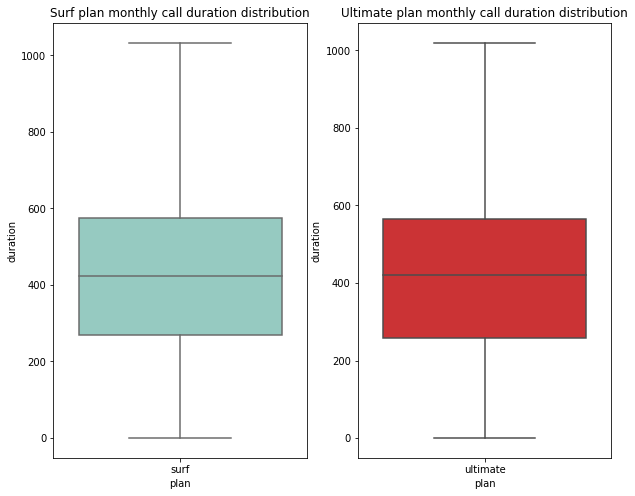

In [50]:
# Plot a boxplot to visualize the distribution of the monthly call duration
fig, (ax1,ax2) = plt.subplots(figsize=(10, 8),nrows=1, ncols=2)

sns.boxplot(data=surf_plan,x='plan', y='call_duration', palette='Set3', showfliers=False, ax=ax1).set(
    title='Surf plan monthly call duration distribution', xlabel = 'plan', ylabel= 'duration')
sns.boxplot(data=ultimate_plan,x='plan', y='call_duration', palette='Set1', showfliers=False, ax=ax2).set(
    title='Ultimate plan monthly call duration distribution', xlabel = 'plan', ylabel= 'duration')






**The users demonstrate very similar behaviour in both surf an ultimate plans with regards to call_duration, that is averaging 430. However, the surf plan client base is more than twice the size that of the ultimate plan.**

### Messages

[Text(0.5, 1.0, 'Ultimate plan monthly messages distribution'),
 Text(0.5, 0, 'plan'),
 Text(0, 0.5, 'messages_num')]

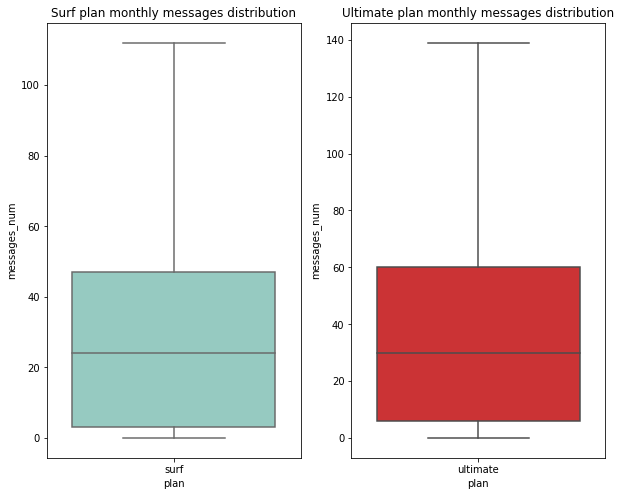

In [51]:
# Compare the number of messages users of each plan tend to send each month
fig, (ax1,ax2) = plt.subplots(figsize=(10, 8),nrows=1, ncols=2)

sns.boxplot(data=surf_plan,x='plan', y='message_num', palette='Set3', showfliers=False, ax=ax1).set(
    title='Surf plan monthly messages distribution', xlabel = 'plan', ylabel= 'messages_num')
sns.boxplot(data=ultimate_plan,x='plan', y='message_num', palette='Set1', showfliers=False, ax=ax2).set(
    title='Ultimate plan monthly messages distribution', xlabel = 'plan', ylabel= 'messages_num')


**The user behaviour with regards to messages is virtually identical.**


### Internet

[Text(0.5, 1.0, 'Ultimate plan monthly internet consumption distribution'),
 Text(0.5, 0, 'plan'),
 Text(0, 0.5, 'gb_used')]

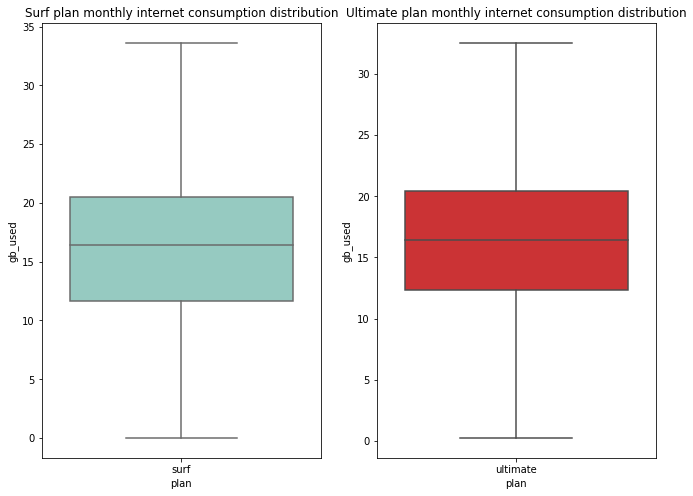

In [52]:
# Compare the amount of internet traffic consumed by users per plan
fig, (ax1,ax2) = plt.subplots(figsize=(11, 8),nrows=1, ncols=2)

sns.boxplot(data=surf_plan,x='plan', y='gb_used', palette='Set3', showfliers=False, ax=ax1).set(
    title='Surf plan monthly internet consumption distribution', xlabel = 'plan', ylabel= 'gb_used')
sns.boxplot(data=ultimate_plan,x='plan', y='gb_used', palette='Set1', showfliers=False, ax=ax2).set(
    title='Ultimate plan monthly internet consumption distribution', xlabel = 'plan', ylabel= 'gb_used')


**The boxplot demonstrates, that ultimate plan users have a tendency to use internet a little bit more, but overall it is hardly noticeable**

## Revenue

Statistically describing the revenue between the plans.

[Text(0.5, 1.0, 'Revenue per plan by month'),
 Text(0.5, 0, 'month'),
 Text(0, 0.5, 'revenue')]

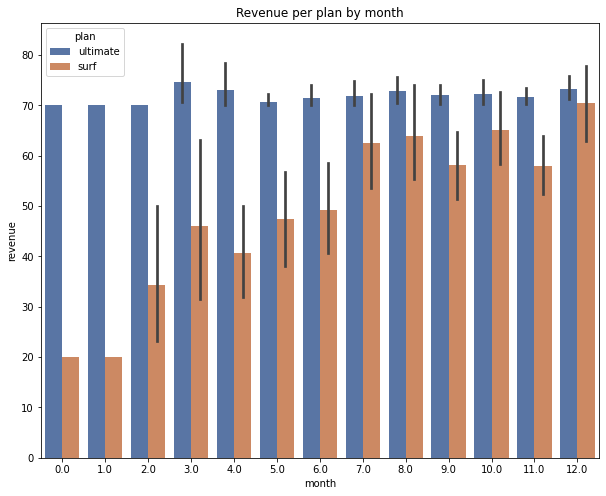

In [53]:
fig = plt.subplots(figsize=(10, 8))
sns.barplot(data=df_merged_plans, x='month_x', y='revenue', hue='plan', palette='deep',).set(
    title='Revenue per plan by month', xlabel = 'month', ylabel= 'revenue')



**The revenue figures for the surf plan stay the same throughout the year in contrast to the ultimate plan, that features an average of 72-73 half the year. One might suggest, that those customers who use the ultimate plan are more active, especially when it comes to internet usage and tend to pay for extra traffic.**

<AxesSubplot:xlabel='month_x', ylabel='call_duration'>

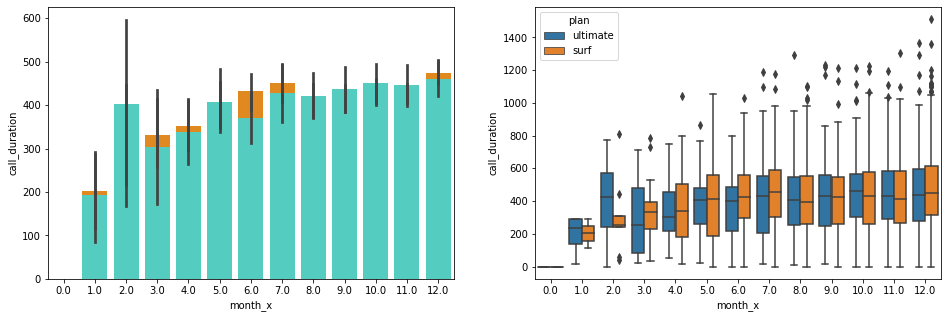

In [54]:
# Create one row with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))


      # Create a histogram for the surf plan
sns.barplot(data=surf_plan, x='month_x', y='call_duration', color='darkorange', ax=axes[0])
      # Create a histogram for the second plan
sns.barplot(data=ultimate_plan, x='month_x', y='call_duration', color='turquoise', ax=axes[0])

      # Create a boxplot for both plans
sns.boxplot(data=df_merged_plans, x='month_x', y='call_duration', hue='plan', ax=axes[1])

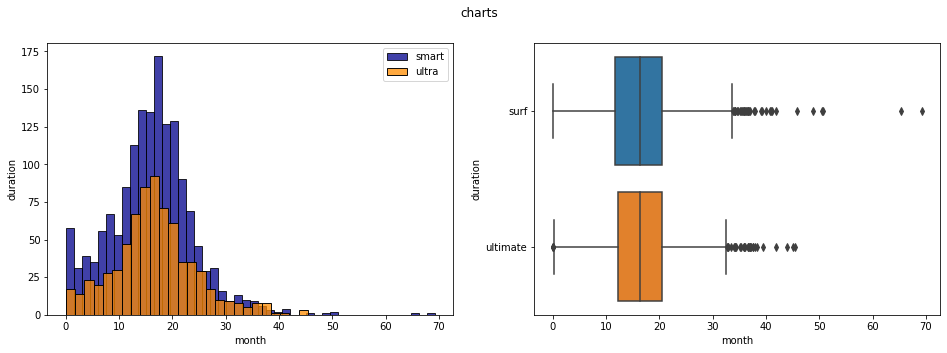

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df_merged_plans.query('plan == "surf"')['gb_used'], color='darkblue', ax=axes[0])
sns.histplot(df_merged_plans.query('plan == "ultimate"')['gb_used'], color='darkorange', ax=axes[0])

sns.boxplot(data=df_merged_plans.sort_values(by='plan'), x='gb_used', y='plan', ax=axes[1])

axes[0].legend(loc='upper right', labels=['smart','ultra'])
axes[0].set_xlabel('month')
axes[0].set_ylabel('duration')
axes[1].set_xlabel('month')
axes[1].set_ylabel('duration')

fig.suptitle('charts');

## Test statistical hypotheses

**Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.**

The null hypothesis H₀ will be:

The average revenue from users of the "ultimate" plan is equal to the average revenue from users of the "surf" plan. <br>

And the alternative hypothesis, H₁ based on H₀:

The average revenue from users of the "ultimate" plan is different from the average revenue from users of the "surf" plan.

In [54]:
#Creating a sample of 200 users for each plan
surf_plan_revenue = surf_plan['revenue'].sample(n=200)
ultimate_plan_revenue = ultimate_plan['revenue'].sample(n=200)


In [55]:
# Testing the H0 hypothesys

alpha = 0.05
results = st.ttest_ind(surf_plan_revenue,ultimate_plan_revenue, equal_var=False)
#testing the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue)
#getting the p-value

if (results.pvalue < alpha):#comparing the p-value you get with the significance level):
    print("The average revenue of the ultimate plan is NOT equal to the average revenue from users of the surf plan.")
else:
    print("We can't reject the null hypothesis: The average revenue of the ultimate plan is equal to the average revenue from users of the surf plan.")


p-value: 1.1127835474341935e-07
The average revenue of the ultimate plan is NOT equal to the average revenue from users of the surf plan.


In [56]:
# Testing the H1 hypothesys
alpha = 0.05
results = st.ttest_ind(surf_plan_revenue,ultimate_plan_revenue, equal_var=False, alternative = 'greater')
#testing the hypothesis that one mean of the two independent populations is greater than the other

print('p-value:', results.pvalue)
#getting the p-value

if (results.pvalue < alpha):
    print("We reject the null hypothesis: The average revenue yielded from the Ultimate plan is no different from that of the Surf plan")
else:
    print("We can't reject the null hypothesis: The average revenue from users of the ultimate plan is different from the average revenue from users of the surf plan.")
    
    
    
    

p-value: 0.9999999443608226
We can't reject the null hypothesis: The average revenue from users of the ultimate plan is different from the average revenue from users of the surf plan.


**Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.**

First of all, the areas are to be separated from the rest of the text in the column
and placed in the column of their own.



In [57]:
df_merged_plans_NYNJ = df_merged_plans[df_merged_plans['city'].str.contains('NY|NJ')]
df_merged_plans_other = df_merged_plans[~df_merged_plans['city'].str.contains('NY|NJ')]


In [58]:
#Creating a sample of 200 users for each region
df_merged_plans_NYNJ_revenue = df_merged_plans_NYNJ['revenue'].sample(n=200)
df_merged_plans_other_revenue = df_merged_plans_other['revenue'].sample(n=200)

The null and the alternative hypotheses:

H0 = The average revenue from users in the NY-NJ area is equal to the other regions <br>
H1 = The average revenue from users in the NY-NJ area is greater than that from the other regions

In [59]:
# Testing the H0 hypothesys
alpha = 0.05
results = st.ttest_ind(df_merged_plans_NYNJ_revenue, df_merged_plans_other_revenue, equal_var=False)
#testing the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue)
#getting the p-value

if (results.pvalue < alpha): #comparing the p-value you get with the significance level):
    print("We reject the null hypothesis: The average revenue in the NY-NJ area differs from that of the other areas")
else:
    print("We can't reject the null hypothesis: The average revenue in the NY-NJ area is about the same to that of the other areas")



p-value: 0.9113233601816746
We can't reject the null hypothesis: The average revenue in the NY-NJ area is about the same to that of the other areas


In [60]:
#Testing the H1 hypothesis
alpha = 0.05
results = st.ttest_ind(df_merged_plans_NYNJ_revenue, df_merged_plans_other_revenue, equal_var=False, alternative='greater')
#testing the hypothesis that the means of the two independent populations are equal

print('p-value:', results.pvalue)
#getting the p-value

if (results.pvalue < alpha): #comparing the p-value you get with the significance level):
    print("We reject the null hypothesis: The average revenue in the NY-NJ is greater that of the other areas")
else:
    print("We can't reject the null hypothesis: The average revenue in the NY-NJ area is NOT greater than the other areas")


p-value: 0.5443383199091627
We can't reject the null hypothesis: The average revenue in the NY-NJ area is NOT greater than the other areas


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

First of all, the data from the dataset was fixed and enriched:
1. To ease calculations later in the project date was broken into years, months and days
2. Date columns were transformed into datetime format
3. Missing values were filled
Then, the data was aggregated per user, which helped gain an insight into how much revenue the company yilded by each user.
Next, the user behaviour was studied, that showed a relative parity with call duration, messages and internet usage for both plans. However, surf plan users tend to use more minutes on average.  
Afterwards, the revenue was statistically described, which revealed, that the revenue figures for the surf plan stay the same throughout the year in contrast to the ultimate plan, that features an average of 72-73 half the year. One might suggest, that those customers who use the ultimate plan are more active, especially when it comes to internet usage and tend to pay for extra traffic.
Lastly, two hypotheses were tested:<br> 
A) Whether the average revenue is different between the two plans or not, and which one is greater.<br>
B) Whether the average revenue from users in the NY-NJ area is equal to other areas and whether NY-NJ area yilded a higher revenue.<br>

As it turns out, as for the first hypothesis: the plans Surf and Ultimate differ from each other in terms of revenue <b>and</b> the average revenue yielded from the Ultimate plan ought to be greater than that from the Surf plan. <br>
As for the second hypothesis: The average revenue in the NY-NJ area differ from that of the other areas <b>and</b> The average revenue in the NY-NJ area is NOT greater than the other areas



